# Dataset

This data set simply extends the number of variables with another web scrape from Metacritic. Unfortunately, there are missing observations as Metacritic only covers a subset of the platforms. Also, a game may not have all the observations of the additional variables discussed below. Complete cases are ~ 6,900
*	Name:	Name of the game
*	Platform:	 Console on which the game is running
*	Year_of_release:	 Year of the game released
*	Genre:	 Game's category
*	Publisher:	 Publisher
*	NA_Sales:	 Game sales in North America (in millions of units)
*	EU_Sales:	 Game sales in the European Union (in millions of units)
*	JP_Sales:	 Game sales in Japan (in millions of units)
*	Other_Sales:	 Game sales in the rest of the world, i.e. Africa, Asia excluding Japan, Australia, Europe excluding the E.U. and
*	Global_Sales:	 Total sales in the world (in millions of units)
*	Critic_Score:	 Aggregate score compiled by Metacritic staff
*	Critic_Count:	 The number of critics used in coming up with the Criticscore
*	User_Score:	 Score by Metacritic's subscribers
*	User_Count:	 Number of users who gave the userscore
*	Developer:	 Party responsible for creating the game
*	Rating:	 The ESRB ratings


# Import Library & Read Data

In [3]:
import google.colab as gc
gc.drive.mount('/content/drive')

Mounted at /content/drive


In [4]:
%cd '/content/drive/MyDrive/final_project'

/content/drive/MyDrive/final_project


In [5]:
# import EDA library
import pandas as pd
import numpy as np
import seaborn as sns

In [6]:
# import graph library
import matplotlib.pyplot as plt

In [7]:
# import sklearn library
import sklearn.datasets as datasets
import sklearn.preprocessing as preprocessing
import sklearn.model_selection as model_selection
import sklearn.metrics as metrics
import sklearn.linear_model as linear_model
from sklearn.metrics import mean_squared_error
from sklearn.metrics import max_error

In [8]:
# import statistic library
from scipy import stats
import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [9]:
#Read data
data = pd.read_csv('Video_Games_Sales.csv')

In [ ]:
data.head()

,Name,Platform,Year_of_Release,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales,Critic_Score,Critic_Count,User_Score,User_Count,Developer,Rating
0,Wii Sports,Wii,2006.0,Sports,Nintendo,41.36,28.96,3.77,8.45,82.53,76.0,51.0,8,322.0,Nintendo,E
1,Super Mario Bros.,NES,1985.0,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24,NaN,NaN,NaN,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,Nintendo,15.68,12.76,3.79,3.29,35.52,82.0,73.0,8.3,709.0,Nintendo,E
3,Wii Sports Resort,Wii,2009.0,Sports,Nintendo,15.61,10.93,3.28,2.95,32.77,80.0,73.0,8,192.0,Nintendo,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.37,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16719 entries, 0 to 16718
Data columns (total 16 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Name             16717 non-null  object 
 1   Platform         16719 non-null  object 
 2   Year_of_Release  16450 non-null  float64
 3   Genre            16717 non-null  object 
 4   Publisher        16665 non-null  object 
 5   NA_Sales         16719 non-null  float64
 6   EU_Sales         16719 non-null  float64
 7   JP_Sales         16719 non-null  float64
 8   Other_Sales      16719 non-null  float64
 9   Global_Sales     16719 non-null  float64
 10  Critic_Score     8137 non-null   float64
 11  Critic_Count     8137 non-null   float64
 12  User_Score       10015 non-null  object 
 13  User_Count       7590 non-null   float64
 14  Developer        10096 non-null  object 
 15  Rating           9950 non-null   object 
dtypes: float64(9), object(7)
memory usage: 2.0+ MB


In [9]:
data.describe(include="all")

,Name,Platform,Year_of_Release,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales,Critic_Score,Critic_Count,User_Score,User_Count,Developer,Rating
count,16717,16719,16450.000000,16717,16665,16719.000000,16719.000000,16719.000000,16719.000000,16719.000000,8137.000000,8137.000000,10015,7590.000000,10096,9950
unique,11562,31,NaN,12,581,NaN,NaN,NaN,NaN,NaN,NaN,NaN,96,NaN,1696,8
top,Need for Speed: Most Wanted,PS2,NaN,Action,Electronic Arts,NaN,NaN,NaN,NaN,NaN,NaN,NaN,tbd,NaN,Ubisoft,E
freq,12,2161,NaN,3370,1356,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2425,NaN,204,3991
mean,NaN,NaN,2006.487356,NaN,NaN,0.263330,0.145025,0.077602,0.047332,0.533543,68.967679,26.360821,NaN,162.229908,NaN,NaN
std,NaN,NaN,5.878995,NaN,NaN,0.813514,0.503283,0.308818,0.186710,1.547935,13.938165,18.980495,NaN,561.282326,NaN,NaN
min,NaN,NaN,1980.000000,NaN,NaN,0.000000,0.000000,0.000000,0.000000,0.010000,13.000000,3.000000,NaN,4.000000,NaN,NaN
25%,NaN,NaN,2003.000000,NaN,NaN,0.000000,0.000000,0.000000,0.000000,0.060000,60.000000,12.000000,NaN,10.000000,NaN,NaN
50%,NaN,NaN,2007.000000,NaN,NaN,0.080000,0.020000,0.000000,0.010000,0.170000,71.000000,21.000000,NaN,24.000000,NaN,NaN
75%,NaN,NaN,2010.000000,NaN,NaN,0.240000,0.110000,0.040000,0.030000,0.470000,79.000000,36.000000,NaN,81.000000,NaN,NaN


# Exploratory Data Analysis

**1. Which year of release had the highest sales worldwide?**

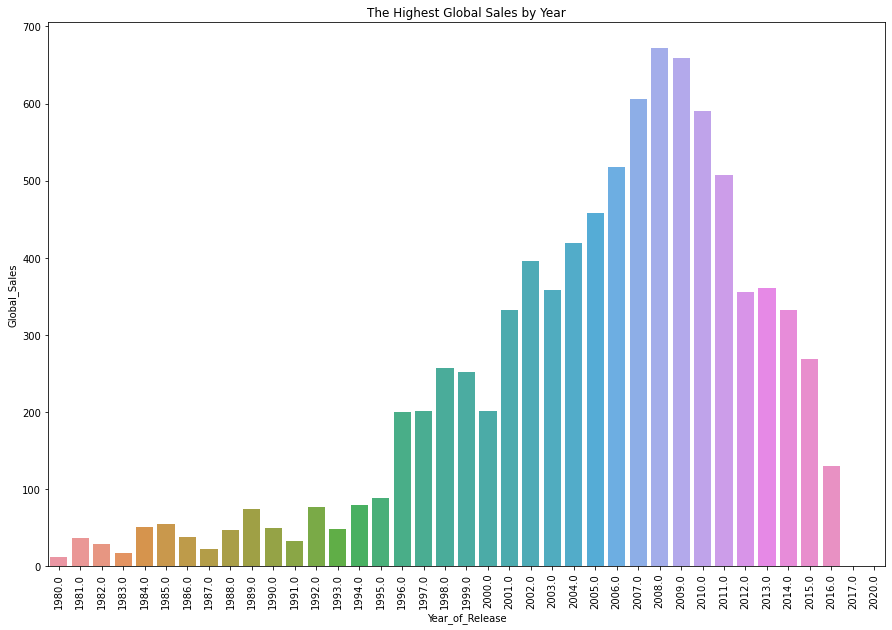

In [10]:
data_year = data.groupby(by=['Year_of_Release'])['Global_Sales'].sum()
data_year = data_year.reset_index()
plt.figure(figsize=(15, 10))
sns.barplot(x="Year_of_Release", y="Global_Sales", data=data_year)
plt.xticks(rotation=90)
plt.title('The Highest Global Sales by Year')
plt.show()

> Peak sales occurred around 2008-2009 with more than 600 million global sales.

**2. Which year had the most game release?**

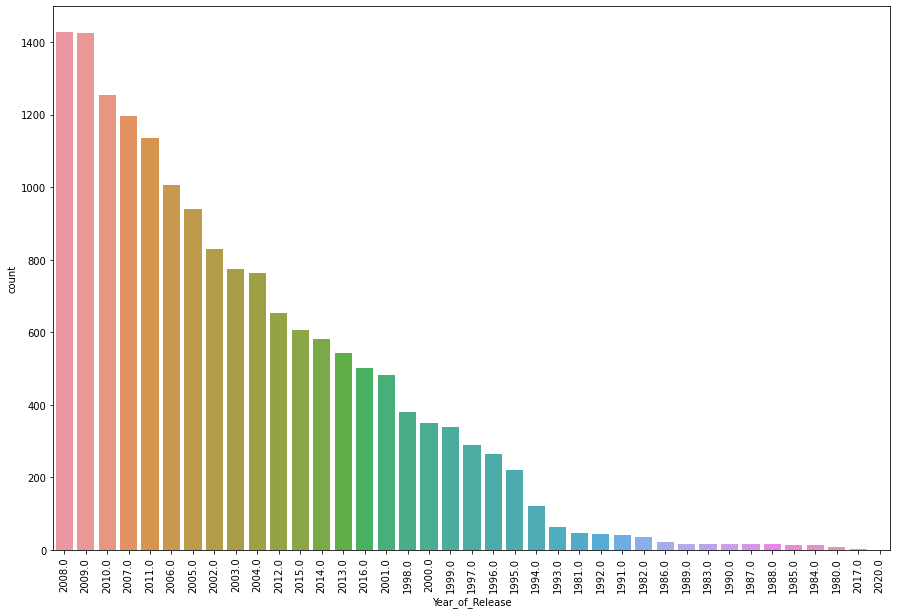

In [11]:
plt.figure(figsize=(15, 10))
sns.countplot(x="Year_of_Release", data=data, order = data.groupby(by=['Year_of_Release'])['Name'].count().sort_values(ascending=False).index)
plt.xticks(rotation=90)
plt.show()

> The number of games released each year greatly affects its sales. 

> Therefore, in 2008-2009 sales were very high, which was more than 600 million. Because it is directly proportional to the number of games released in the same year, which is more than 1400 games.


**3. Which genre game have the highest sale price globally?**

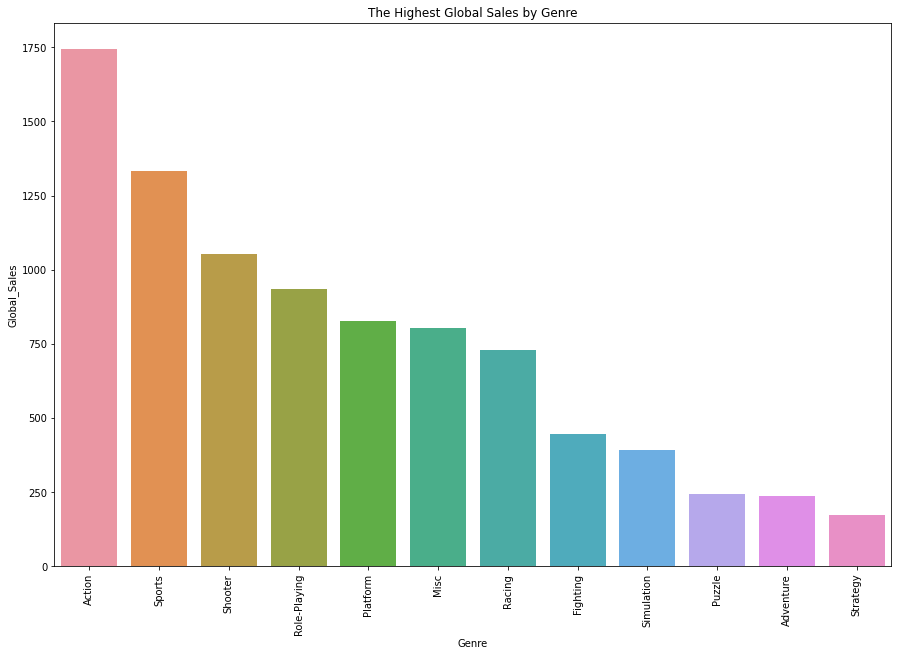

In [13]:
data_genre = data.groupby(by=['Genre'])['Global_Sales'].sum()
data_genre = data_genre.reset_index()
data_genre = data_genre.sort_values(by=['Global_Sales'], ascending=False)
plt.figure(figsize=(15, 10))
sns.barplot(x="Genre", y="Global_Sales", data=data_genre)
plt.xticks(rotation=90)
plt.title('The Highest Global Sales by Genre')
plt.show()

In [ ]:
data_genre['percent'] = (data_genre['Global_Sales'] / data_genre['Global_Sales'].sum()) * 100
data_genre.head()

,Genre,Global_Sales,percent
0,Action,1745.27,19.570458
10,Sports,1332.00,14.936285
8,Shooter,1052.94,11.807066
7,Role-Playing,934.40,10.477827
4,Platform,828.08,9.285615


> Action and Sport are the genres with the most global sales.

**4. Which genre game has been released the most in a single year?**

In [18]:
year_max_df = data.groupby(['Year_of_Release', 'Genre']).size().reset_index(name='count')
year_max_idx = year_max_df.groupby(['Year_of_Release'])['count'].transform(max) == year_max_df['count']
year_max_genre = year_max_df[year_max_idx].reset_index(drop=True)
year_max_genre = year_max_genre.drop_duplicates(subset=["Year_of_Release", "count"], keep='last').reset_index(drop=True)
genre = year_max_genre['Genre'].values

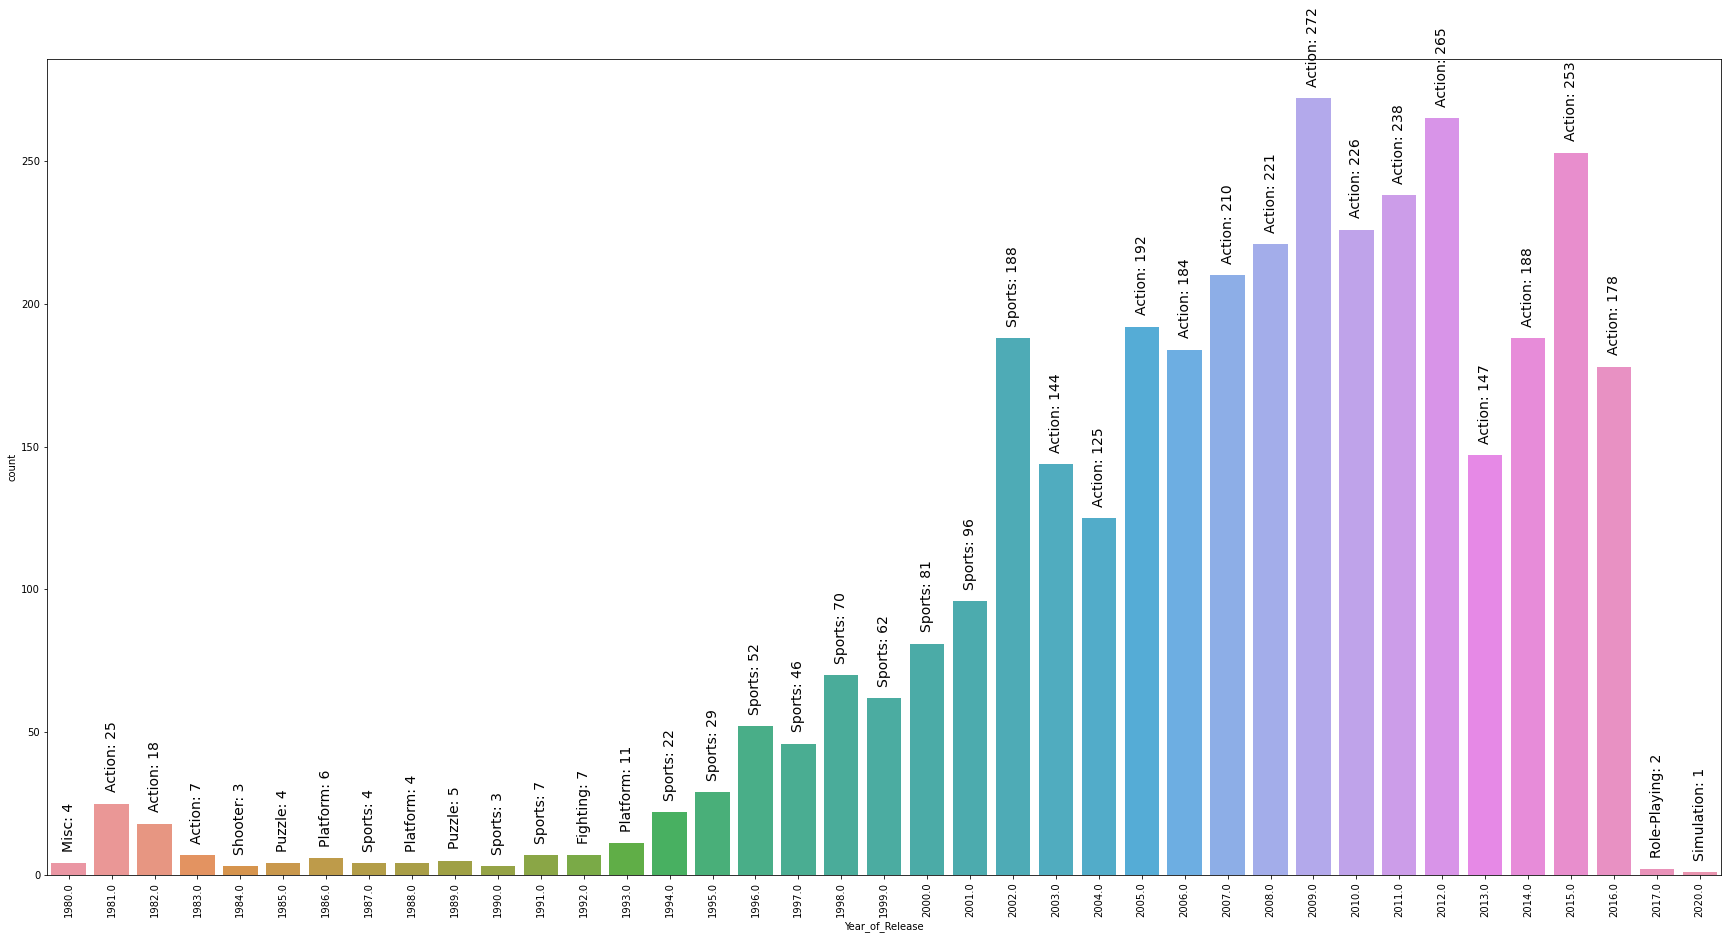

In [20]:
plt.figure(figsize=(30, 15))
g = sns.barplot(x='Year_of_Release', y='count', data=year_max_genre)
index = 0
for value in year_max_genre['count'].values:
#     print(asd)
    g.text(index, value + 5, str(genre[index] + ': ' +str(value)), color='#000', size=14, rotation= 90, ha="center")
    index += 1
plt.xticks(rotation=90)
plt.show()

> Action and sports are the genres that dominate game releases every year, even consecutively from 1994 to 2016.

**5. Which genre game has sold the most by year of release?**

In [ ]:
year_sale_dx = data.groupby(by=['Year_of_Release', 'Genre'])['Global_Sales'].sum().reset_index()
year_sale = year_sale_dx.groupby(by=['Year_of_Release'])['Global_Sales'].transform(max) == year_sale_dx['Global_Sales']
year_sale_max = year_sale_dx[year_sale].reset_index(drop=True)
genre = year_sale_max['Genre']

In [ ]:
year_sale_dx.head()

,Year_of_Release,Genre,Global_Sales
0,1980.0,Action,0.34
1,1980.0,Fighting,0.77
2,1980.0,Misc,2.71
3,1980.0,Shooter,7.07
4,1980.0,Sports,0.49


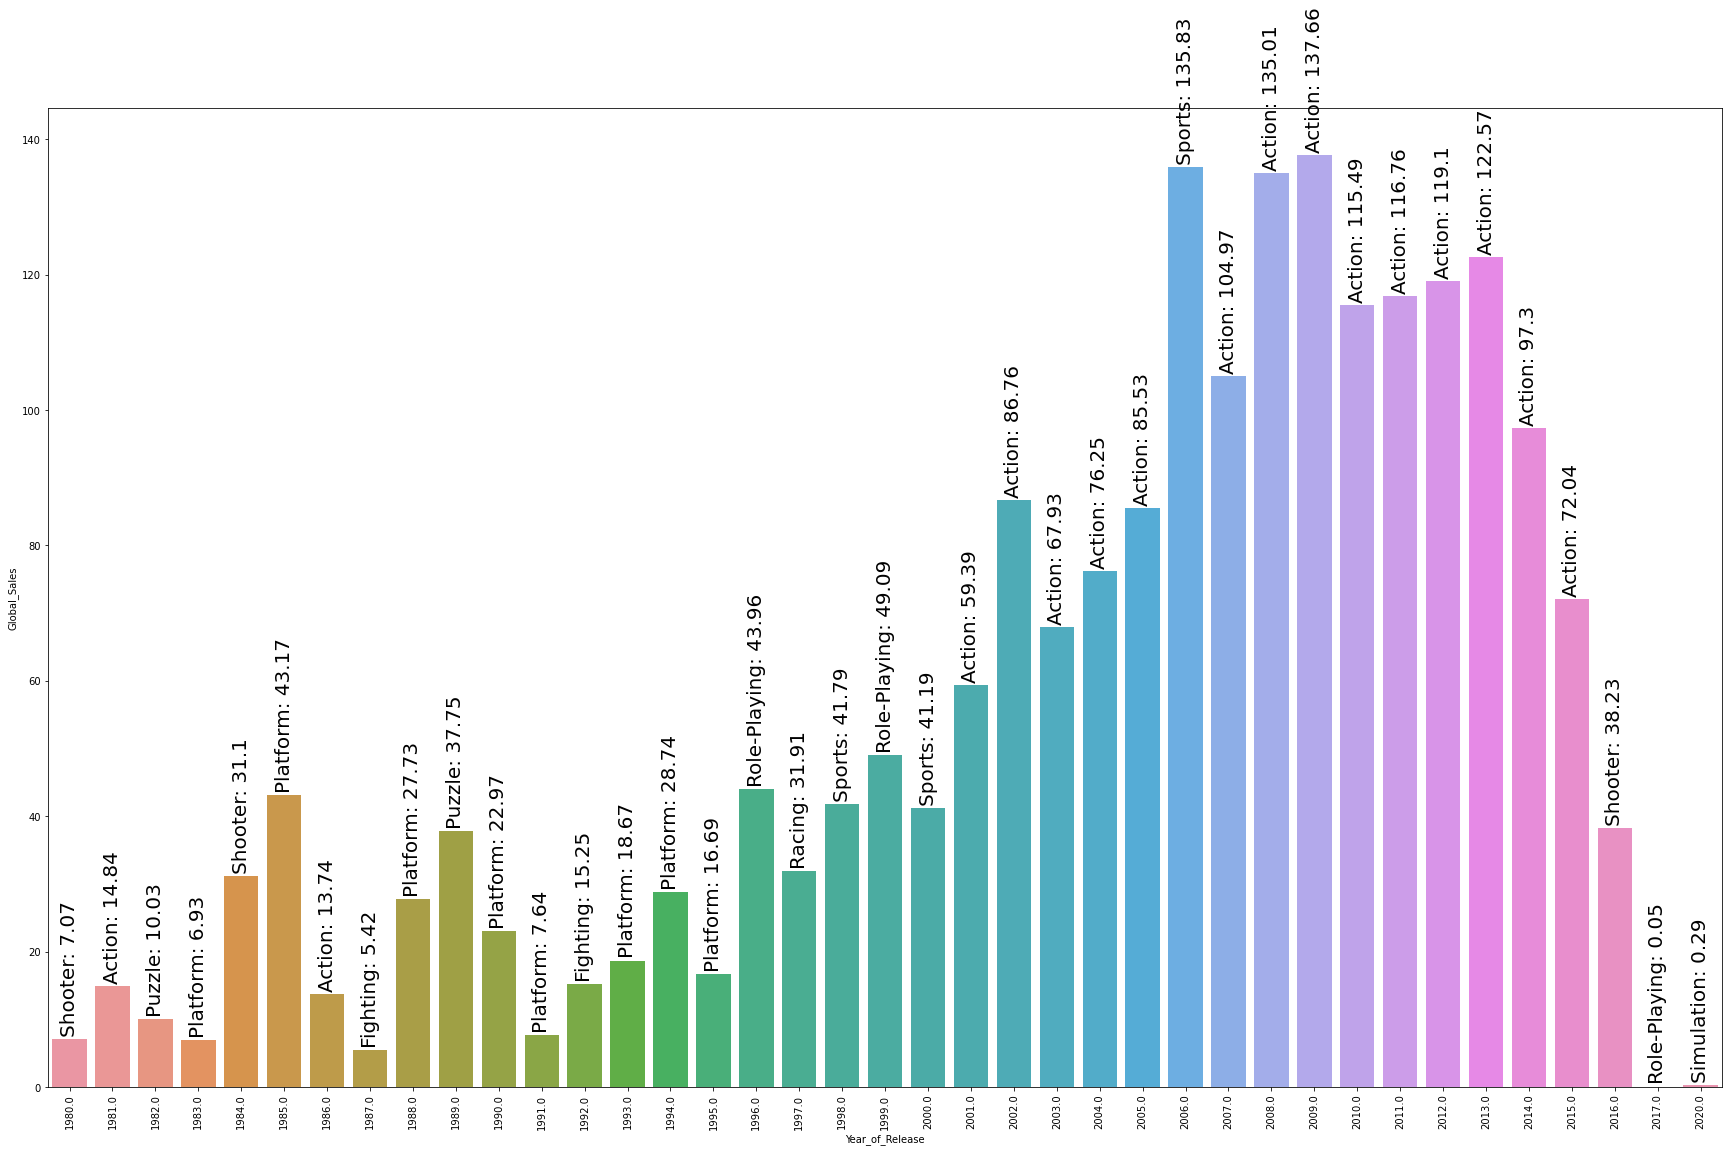

In [ ]:
plt.figure(figsize=(30, 18))
g = sns.barplot(x='Year_of_Release', y='Global_Sales', data=year_sale_max)
index = 0
for value in year_sale_max['Global_Sales']:
    g.text(index, value + 1, str(genre[index] + ': ' +str(round(value, 2))), color='#000', size=20, rotation= 90, ha="center")
    index += 1

plt.xticks(rotation=90)
plt.show()

> As the games with the most releases every year, of course it will also affect sales.

**6. How do sales compare in each region by genre?**

In [ ]:
comp_genre = data[['Genre', 'NA_Sales', 'EU_Sales', 'JP_Sales', 'Other_Sales']]
comp_map = comp_genre.groupby(by=['Genre']).sum()

In [ ]:
comp_table = comp_map.reset_index()
comp_table = pd.melt(comp_table, id_vars=['Genre'], value_vars=['NA_Sales', 'EU_Sales', 'JP_Sales', 'Other_Sales'], var_name='Sale_Area', value_name='Sale_Price')

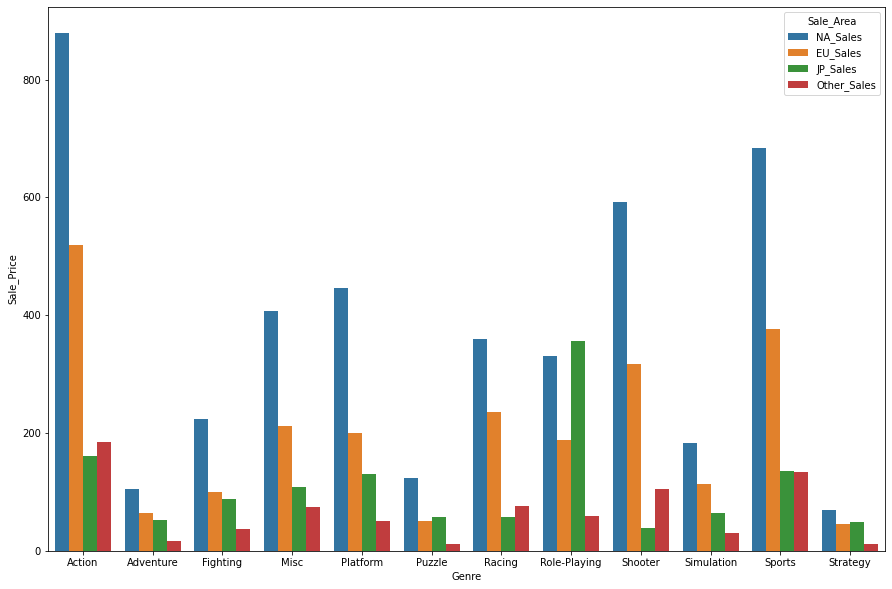

In [ ]:
plt.figure(figsize=(15, 10))
sns.barplot(x='Genre', y='Sale_Price', hue='Sale_Area', data=comp_table)

> * Action, Sports and Shooter have much sales compare with others.
> * North America (NA_sales) have heights sales all the time.
> * Except for Japan with a very high interest in the role-playing genre, surpassing even other regions for this genre.

 **7. Which platfrom have the highest sale price globally?**

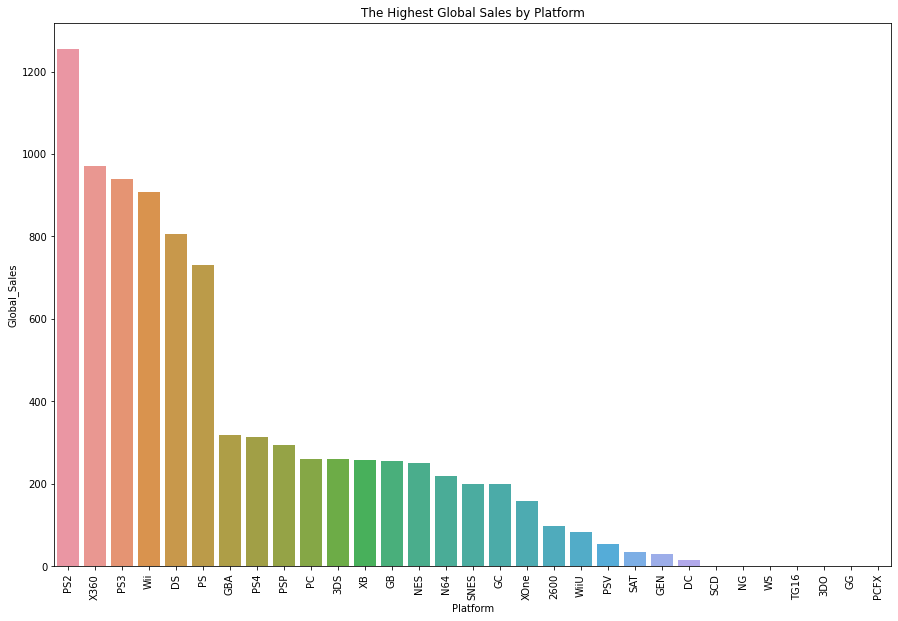

In [ ]:
data_platform = data.groupby(by=['Platform'])['Global_Sales'].sum()
data_platform = data_platform.reset_index()
data_platform = data_platform.sort_values(by=['Global_Sales'], ascending=False)
plt.figure(figsize=(15, 10))
sns.barplot(x="Platform", y="Global_Sales", data=data_platform)
plt.xticks(rotation=90)
plt.title('The Highest Global Sales by Platform')
plt.show()

> It's clearly shown that X360, Wii, DS, and all PS are market leader.

**8. How do sales compare in each region by platform?**

In [14]:
comp_platform = data[['Platform', 'NA_Sales', 'EU_Sales', 'JP_Sales', 'Other_Sales']]
comp_platform = comp_platform.groupby(by=['Platform']).sum().reset_index()
comp_table = pd.melt(comp_platform, id_vars=['Platform'], value_vars=['NA_Sales', 'EU_Sales', 'JP_Sales', 'Other_Sales'], var_name='Sale_Area', value_name='Sale_Price')

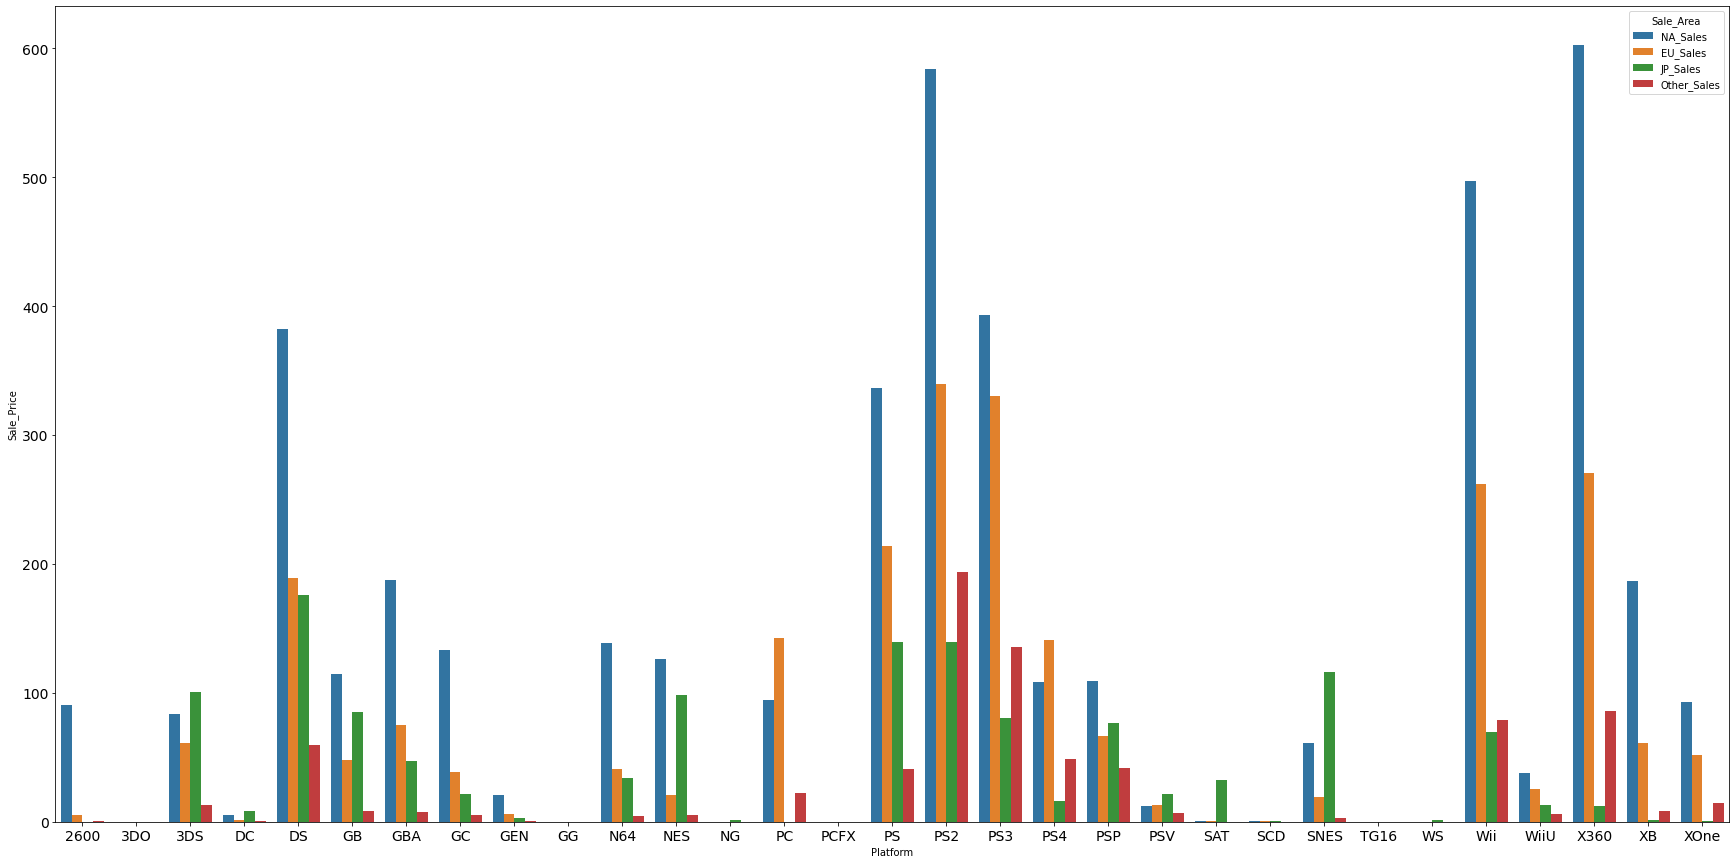

In [ ]:
plt.figure(figsize=(30, 15))
sns.barplot(x='Platform', y='Sale_Price', hue='Sale_Area', data=comp_table)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.show()

> North America and Europe are dominated by market leader platforms.

**9. Which individual game have the highest sale price globally?**

In [15]:
top_game_sale = data.head(20)
top_game_sale = top_game_sale[['Name', 'Year_of_Release', 'Genre', 'Global_Sales']]
top_game_sale = top_game_sale.sort_values(by=['Global_Sales'], ascending=False)

In [16]:
name = top_game_sale['Name']
year = top_game_sale['Year_of_Release']
y = np.arange(0, 20)

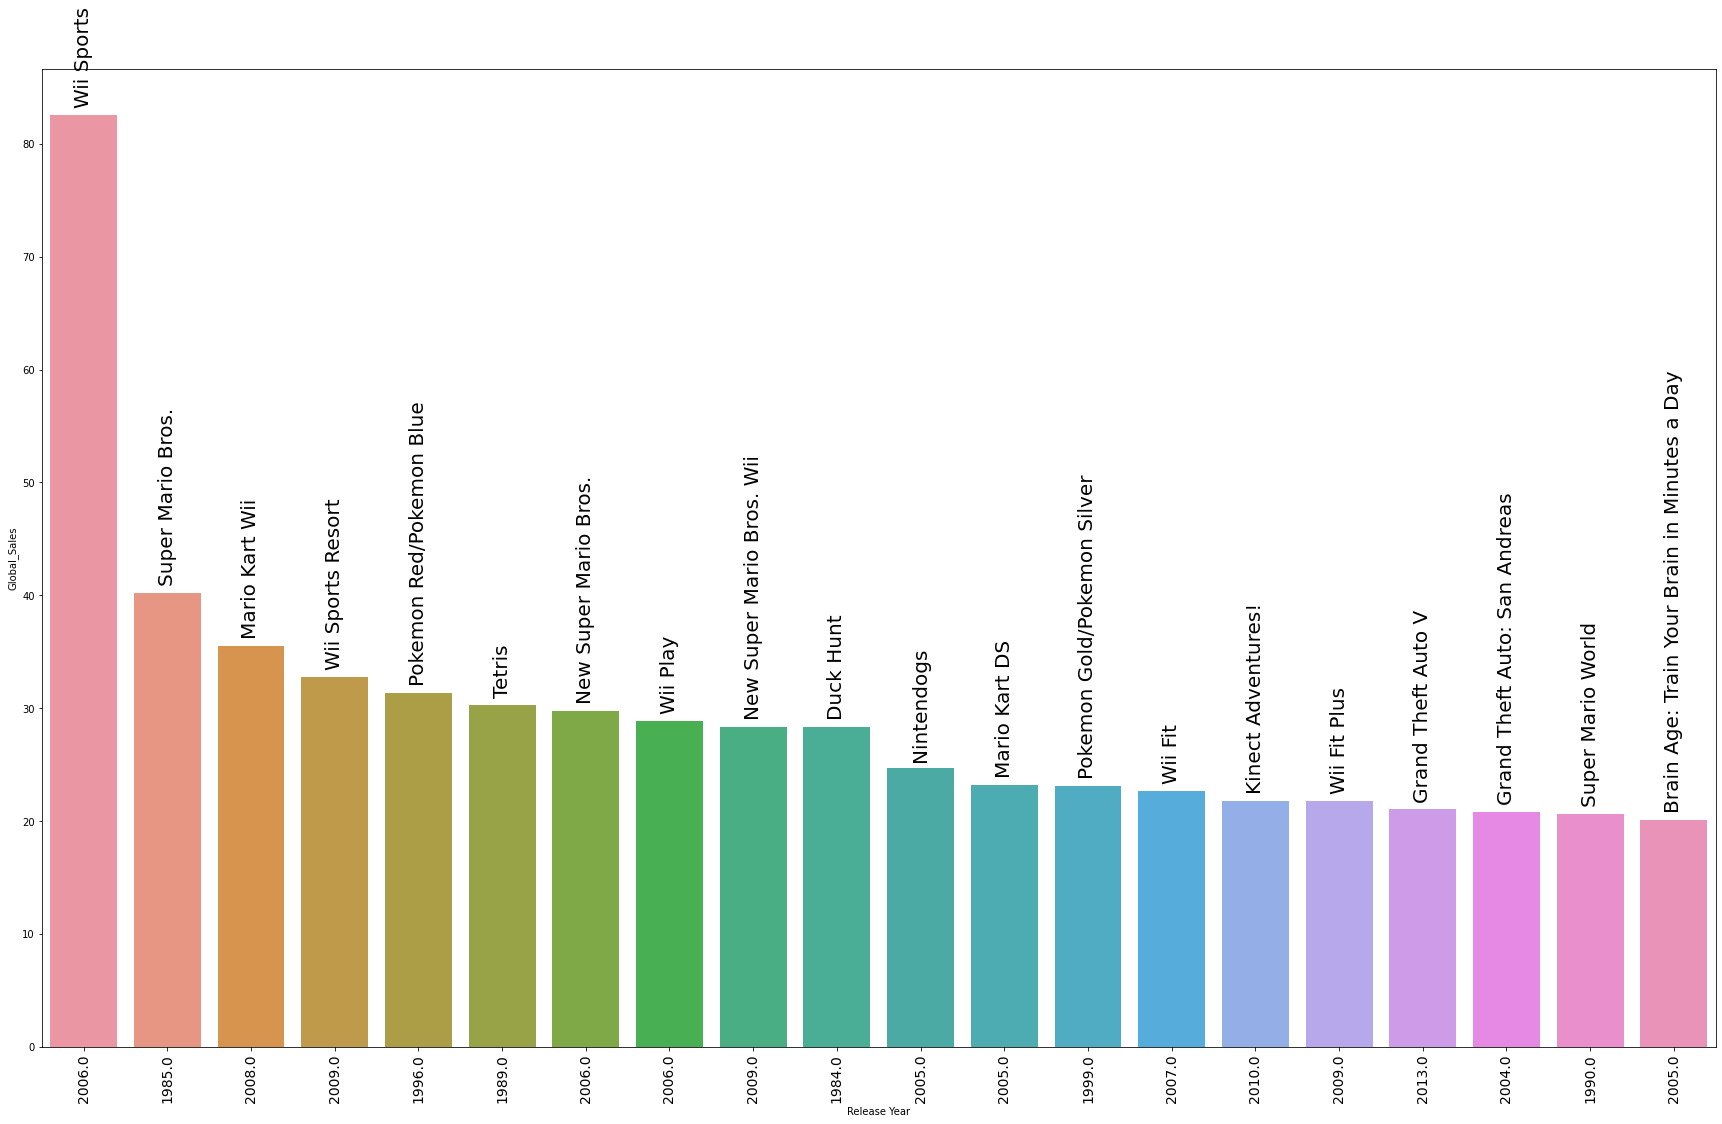

In [ ]:
plt.figure(figsize=(30, 18))
g = sns.barplot(x='Name', y='Global_Sales', data=top_game_sale)
index = 0
for value in top_game_sale['Global_Sales']:
    g.text(index, value + 1, name[index], color='#000', size=20, rotation= 90, ha="center")
    index += 1

plt.xticks(y, top_game_sale['Year_of_Release'], fontsize=14, rotation=90)
plt.xlabel('Release Year')
plt.show()

> Wii Sport is the game with the highest global sales, even more than double the sales of Super Mario Bros.

**10. Top publisher with most released games.**

In [ ]:
top_publisher = data.groupby(by=['Publisher'])['Year_of_Release'].count().sort_values(ascending=False).head(20)
top_publisher = pd.DataFrame(top_publisher).reset_index()

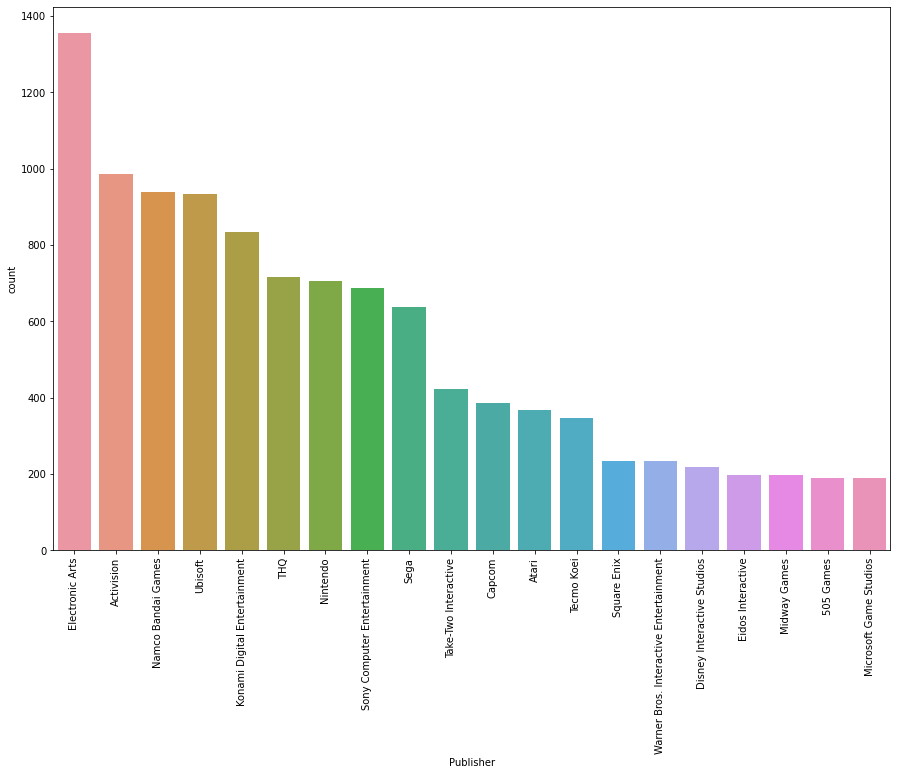

In [ ]:
plt.figure(figsize=(15, 10))
sns.countplot(x="Publisher", data=data, order = data.groupby(by=['Publisher'])['Year_of_Release'].count().sort_values(ascending=False).iloc[:20].index)
plt.xticks(rotation=90)
plt.show()

> Electronic Arts is the publisher with the most number of games released.

**11. Which publisher have the highest sale price globally?**

In [ ]:
sale_pbl = data[['Publisher', 'Global_Sales']]
sale_pbl = sale_pbl.groupby('Publisher')['Global_Sales'].sum().sort_values(ascending=False).head(20)
sale_pbl = pd.DataFrame(sale_pbl).reset_index()

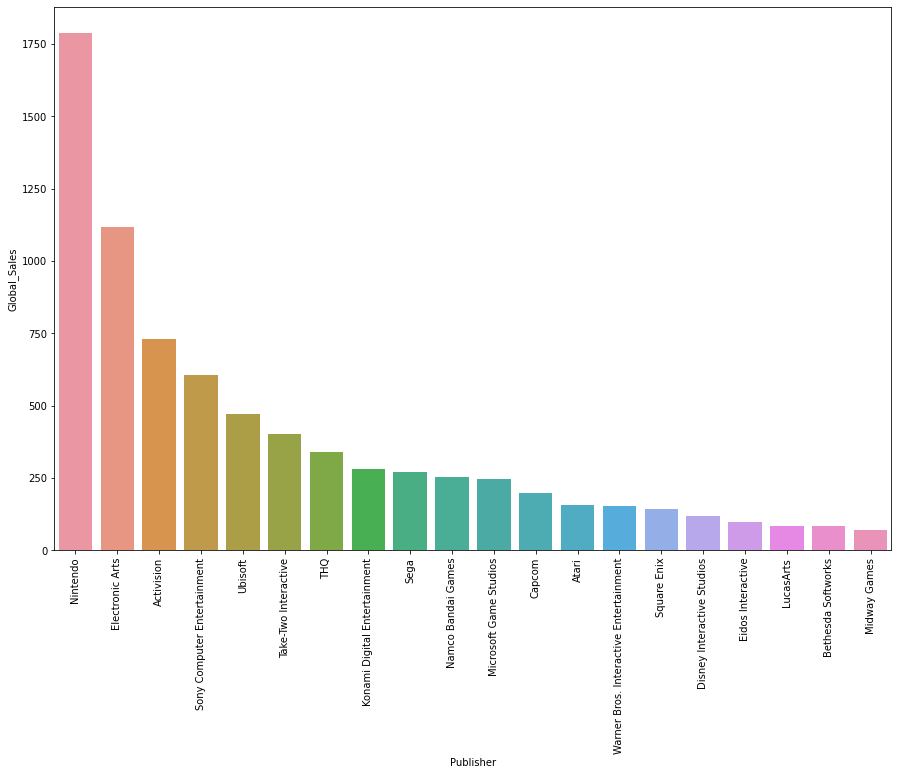

In [ ]:
plt.figure(figsize=(15, 10))
sns.barplot(x='Publisher', y='Global_Sales', data=sale_pbl)
plt.xticks(rotation=90)
plt.show()

> Surprisingly, even though Nintendo only has half the number of games compared to Electronic Arts, Nintendo is the publisher that gets the most sales.

**12. How much the total revenue by region?**

In [21]:
top_sale_reg = data[['NA_Sales', 'EU_Sales', 'JP_Sales', 'Other_Sales']]
top_sale_reg = top_sale_reg.sum().reset_index()
top_sale_reg = top_sale_reg.rename(columns={"index": "region", 0: "sale"})
top_sale_reg

,region,sale
0,NA_Sales,4402.62
1,EU_Sales,2424.67
2,JP_Sales,1297.43
3,Other_Sales,791.34


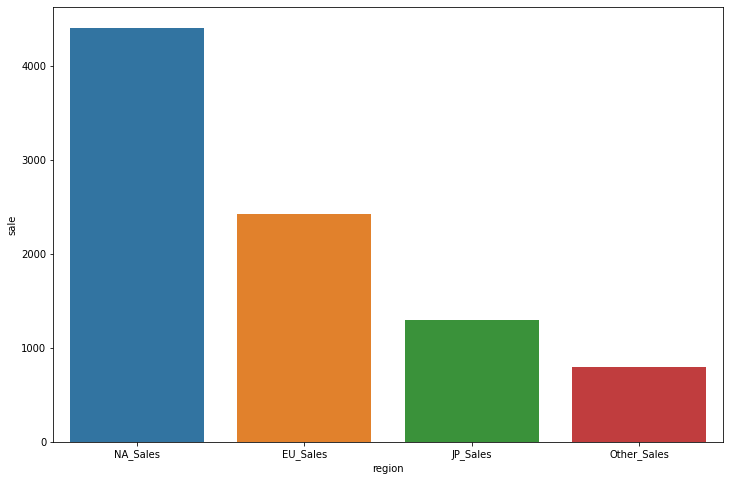

In [22]:
plt.figure(figsize=(12, 8))
sns.barplot(x='region', y='sale', data = top_sale_reg)

In [ ]:
labels = top_sale_reg['region']
sizes = top_sale_reg['sale']

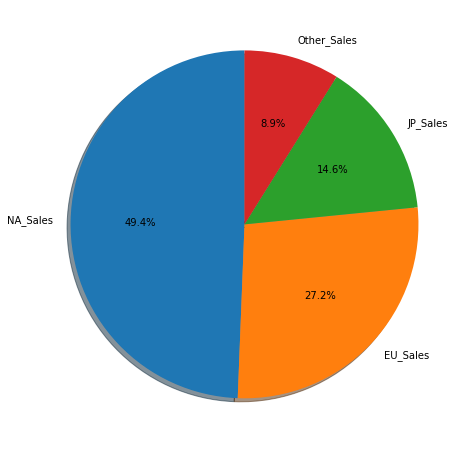

In [ ]:
plt.figure(figsize=(10, 8))
plt.pie(sizes, labels=labels, autopct='%1.1f%%', shadow=True, startangle=90, )
plt.show()

> North America almost covers 50% of sales, this shows that video games in North America are more popular than in other regions.

In [1]:
def donut_chart(column, palette="Set2"):
    values = column.value_counts().values
    labels = column.value_counts().index
    plt.pie(values, colors=sns.color_palette(palette), 
            labels=labels, autopct="%1.1f%%", 
            startangle=90, pctdistance=0.85)
    #draw circle
    centre_circle = plt.Circle((0,0), 0.70, fc="white")
    fig = plt.gcf()
    fig.gca().add_artist(centre_circle)

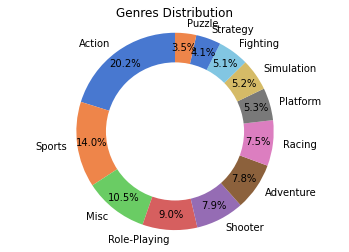

In [26]:
donut_chart(data['Genre'], palette="muted")
plt.title("Genres Distribution")
plt.axis("equal");

# Data Preprocessing

## Replace Undefined Value

In [17]:
# replace "tbd" value with nan and transform column into float
data["User_Score"] = data["User_Score"].replace("tbd", np.nan).astype(float)

## Handle Missing Value

In [ ]:
data.isnull().sum()

Name                  2
Platform              0
Year_of_Release     269
Genre                 2
Publisher            54
NA_Sales              0
EU_Sales              0
JP_Sales              0
Other_Sales           0
Global_Sales          0
Critic_Score       8582
Critic_Count       8582
User_Score         9129
User_Count         9129
Developer          6623
Rating             6769
dtype: int64

In [18]:
# check na value and percentages of missing data 
total_na = data.isnull().sum().sort_values(ascending=False)
percent_na = (data.isnull().sum()/data['Global_Sales'].count()).sort_values(ascending=False) * 100
missing_data = pd.concat([total_na , percent_na], axis=1, keys=['NA Total', 'Percent'])
missing_data

,NA Total,Percent
User_Count,9129,54.602548
User_Score,9129,54.602548
Critic_Count,8582,51.330821
Critic_Score,8582,51.330821
Rating,6769,40.486871
Developer,6623,39.613613
Year_of_Release,269,1.608948
Publisher,54,0.322986
Genre,2,0.011962
Name,2,0.011962


In [19]:
#Drop missing values
df = data.copy()
df = df.dropna()
df.describe(include='all')

,Name,Platform,Year_of_Release,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales,Critic_Score,Critic_Count,User_Score,User_Count,Developer,Rating
count,6825,6825,6825.000000,6825,6825,6825.000000,6825.000000,6825.000000,6825.000000,6825.000000,6825.000000,6825.000000,6825.000000,6825.000000,6825,6825
unique,4377,17,NaN,12,262,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1289,7
top,LEGO Star Wars II: The Original Trilogy,PS2,NaN,Action,Electronic Arts,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,EA Canada,T
freq,8,1140,NaN,1630,944,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,149,2377
mean,NaN,NaN,2007.436777,NaN,NaN,0.394484,0.236089,0.064158,0.082677,0.777590,70.272088,28.931136,7.185626,174.722344,NaN,NaN
std,NaN,NaN,4.211248,NaN,NaN,0.967385,0.687330,0.287570,0.269871,1.963443,13.868572,19.224165,1.439942,587.428538,NaN,NaN
min,NaN,NaN,1985.000000,NaN,NaN,0.000000,0.000000,0.000000,0.000000,0.010000,13.000000,3.000000,0.500000,4.000000,NaN,NaN
25%,NaN,NaN,2004.000000,NaN,NaN,0.060000,0.020000,0.000000,0.010000,0.110000,62.000000,14.000000,6.500000,11.000000,NaN,NaN
50%,NaN,NaN,2007.000000,NaN,NaN,0.150000,0.060000,0.000000,0.020000,0.290000,72.000000,25.000000,7.500000,27.000000,NaN,NaN
75%,NaN,NaN,2011.000000,NaN,NaN,0.390000,0.210000,0.010000,0.070000,0.750000,80.000000,39.000000,8.200000,89.000000,NaN,NaN


In [ ]:
df.isnull().sum()

Name               0
Platform           0
Year_of_Release    0
Genre              0
Publisher          0
NA_Sales           0
EU_Sales           0
JP_Sales           0
Other_Sales        0
Global_Sales       0
Critic_Score       0
Critic_Count       0
User_Score         0
User_Count         0
Developer          0
Rating             0
dtype: int64

## Handle Outlier

In [ ]:
# simple data checking - get columns name
print(df.columns)

Index(['Name', 'Platform', 'Year_of_Release', 'Genre', 'Publisher', 'NA_Sales',
       'EU_Sales', 'JP_Sales', 'Other_Sales', 'Global_Sales', 'Critic_Score',
       'Critic_Count', 'User_Score', 'User_Count', 'Developer', 'Rating'],
      dtype='object')


In [21]:
# assign variable for column in numeric type
numeric_column = ['Year_of_Release', 'NA_Sales',
       'EU_Sales', 'JP_Sales', 'Other_Sales', 'Critic_Score',
       'Critic_Count', 'User_Score', 'User_Count', 'Global_Sales']

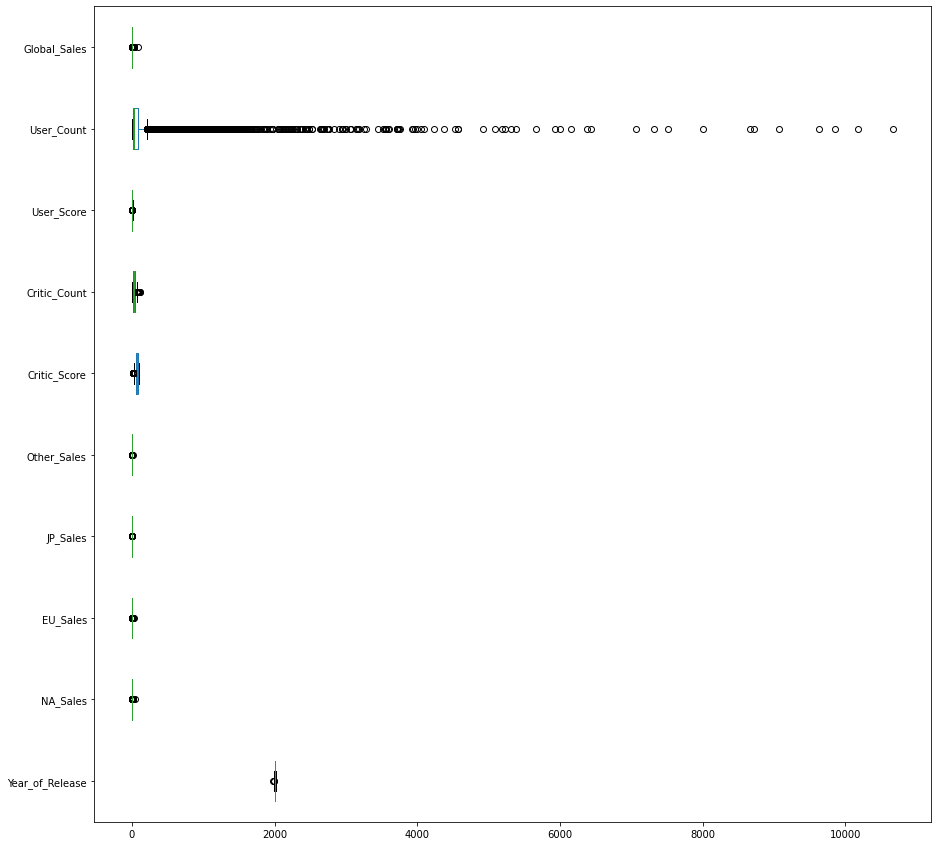

In [ ]:
# check outlier using boxplot
df.boxplot(column=numeric_column,fontsize=10,rot=0,grid=False,figsize=(15,15),vert=False)

In [22]:
# get IQR for each numeric column
Q1 = df[numeric_column].quantile(0.25)
Q3 = df[numeric_column].quantile(0.75)
IQR = Q3 - Q1
boxplot_min = Q1 - 1.5 * IQR
boxplot_max = Q3 + 1.5 * IQR
print('Q1:\n',Q1)
print('\nQ3:\n',Q3)
print('\nIQR:\n',IQR)
print('\nMin:\n',boxplot_min)
print('\nMax:\n',boxplot_max)

Q1:
 Year_of_Release    2004.00
NA_Sales              0.06
EU_Sales              0.02
JP_Sales              0.00
Other_Sales           0.01
Critic_Score         62.00
Critic_Count         14.00
User_Score            6.50
User_Count           11.00
Global_Sales          0.11
Name: 0.25, dtype: float64

Q3:
 Year_of_Release    2011.00
NA_Sales              0.39
EU_Sales              0.21
JP_Sales              0.01
Other_Sales           0.07
Critic_Score         80.00
Critic_Count         39.00
User_Score            8.20
User_Count           89.00
Global_Sales          0.75
Name: 0.75, dtype: float64

IQR:
 Year_of_Release     7.00
NA_Sales            0.33
EU_Sales            0.19
JP_Sales            0.01
Other_Sales         0.06
Critic_Score       18.00
Critic_Count       25.00
User_Score          1.70
User_Count         78.00
Global_Sales        0.64
dtype: float64

Min:
 Year_of_Release    1993.500
NA_Sales             -0.435
EU_Sales             -0.265
JP_Sales             -0.015
Othe

In [23]:
# remove outlier
non_outlier_df = df.copy()
for x in numeric_column:
  filter_min = non_outlier_df[x]<boxplot_min[x]
  filter_max = non_outlier_df[x]>boxplot_max[x]
  non_outlier_df = non_outlier_df[~(
    filter_min|filter_max
    )]

In [24]:
non_outlier_df.shape

(4030, 16)

# Regression

## Correlation Between Column

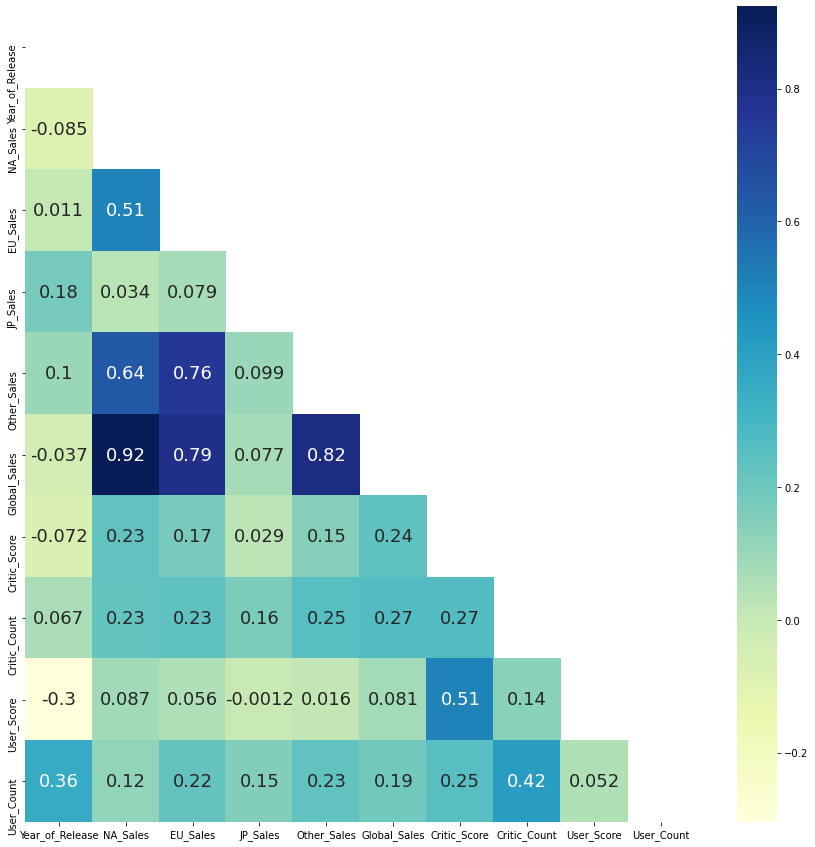

In [ ]:
# check correlation between column
correlation_between_column = non_outlier_df.corr()
upper_triangle_corr = np.triu(correlation_between_column)

fig, ax = plt.subplots(figsize=(15,15))
sns.heatmap(correlation_between_column, annot = True, cmap="YlGnBu",ax=ax,annot_kws={"size":18},mask=upper_triangle_corr)

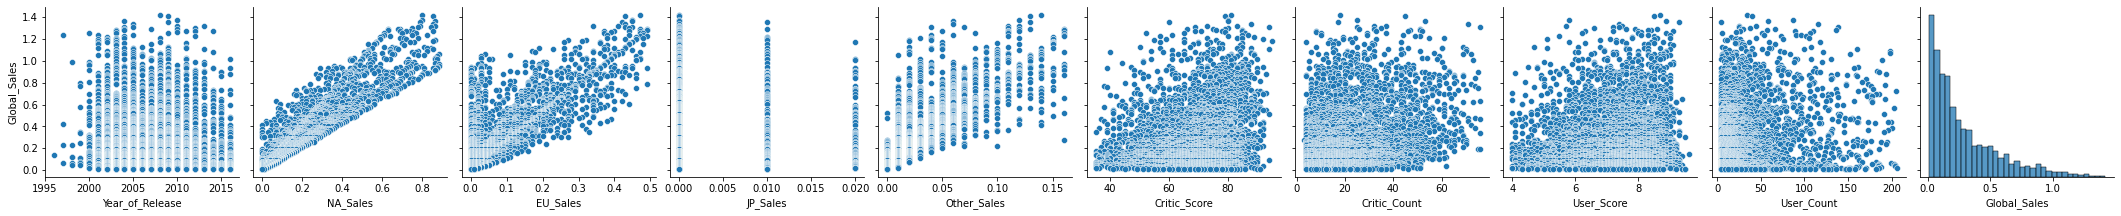

In [ ]:
# check linearity between target vs feature
scatter_plot_between_target_feature = sns.pairplot(
    data=non_outlier_df,
    y_vars=['Global_Sales'],
    x_vars=numeric_column,
    height=3,
    kind='scatter'
    )

## Multicollinearity Checking

In [ ]:
# indicate which variables to compute VIF
new_feature = non_outlier_df[['Critic_Score','Critic_Count','User_Score','User_Count']]

# add intercept
new_feature['intercept'] = 1

# compute VIF
vif = pd.DataFrame()
vif["variables"] = new_feature.columns
vif["VIF"] = [variance_inflation_factor(new_feature.values, i) for i in range(new_feature.shape[1])]

# output
vif

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """


,variables,VIF
0,Critic_Score,1.481578
1,Critic_Count,1.255623
2,User_Score,1.364675
3,User_Count,1.257625
4,intercept,46.031209


## Drop Unnecessary Column

In [25]:
print(pd.value_counts(non_outlier_df['Rating']))

T       1420
E       1357
M        639
E10+     613
RP         1
Name: Rating, dtype: int64


ESRB Rating
*   T = Teen (13 and older)
*   E = Everyone (6 and older)
*   M = Mature (17 and older)
*   E10+ = (10 and older)
*   AO = Adult only (18 and older)
*   K-A = Kids to Adults (known as Everyone)
*   RP = Rating Pending

In [26]:
#Remove unnecessary rating
non_outlier_df = non_outlier_df[non_outlier_df['Rating'].str.contains("RP")==False]

In [27]:
#all sales columns have a high correlation with global, so I will remove all sales column and use only global column
dropped_df = non_outlier_df.drop(['Name','Year_of_Release', 'Publisher', 'Developer', 'NA_Sales','JP_Sales', 'EU_Sales', 'Other_Sales'], axis=1)


In [ ]:
dropped_df.shape

(4029, 8)

## Make Dummy Variable

In [30]:
# create dummies variable (Except: Publisher and Developer)
dummies_df = pd.get_dummies(data=dropped_df, columns=['Platform','Genre','Rating'])
dummies_df.head()

,Global_Sales,Critic_Score,Critic_Count,User_Score,User_Count,Platform_3DS,Platform_DS,Platform_GBA,Platform_GC,Platform_PC,Platform_PS,Platform_PS2,Platform_PS3,Platform_PS4,Platform_PSP,Platform_PSV,Platform_Wii,Platform_WiiU,Platform_X360,Platform_XB,Platform_XOne,Genre_Action,Genre_Adventure,Genre_Fighting,Genre_Misc,Genre_Platform,Genre_Puzzle,Genre_Racing,Genre_Role-Playing,Genre_Shooter,Genre_Simulation,Genre_Sports,Genre_Strategy,Rating_E,Rating_E10+,Rating_M,Rating_T
1357,1.42,81.0,18.0,8.7,34.0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0
1366,1.41,79.0,45.0,8.5,40.0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0
1412,1.37,80.0,25.0,5.8,87.0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0
1419,1.36,80.0,53.0,8.9,58.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1
1432,1.35,60.0,17.0,9.3,4.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0


## Do Regression

In [ ]:
## assign feature and target
final_feature_array = dummies_df.drop(['Global_Sales'], axis=1)
target_array = dummies_df[['Global_Sales']]

In [ ]:
# transform feature
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
scaler.fit(final_feature_array)

StandardScaler(copy=True, with_mean=True, with_std=True)
final_feature_scaled = scaler.transform(final_feature_array)
final_feature_scaled

array([[ 1.06436142, -0.39604958,  1.23421567, ..., -0.42361498,
        -0.43416077, -0.73774646],
       [ 0.90074471,  1.43931982,  1.06679467, ...,  2.36063419,
        -0.43416077, -0.73774646],
       [ 0.98255307,  0.07978693, -1.19338888, ..., -0.42361498,
         2.30329423, -0.73774646],
       ...,
       [ 1.06436142, -0.80390944,  1.31792617, ..., -0.42361498,
         2.30329423, -0.73774646],
       [-0.57180568, -0.80390944, -1.19338888, ..., -0.42361498,
        -0.43416077,  1.35547923],
       [-0.65361404, -0.80390944, -0.02144186, ...,  2.36063419,
        -0.43416077, -0.73774646]])

In [ ]:
print('shape of final feature:',final_feature_array.shape)
print('shape of target:',target_array.shape)

shape of final feature: (4029, 36)
shape of target: (4029, 1)


In [ ]:
# split the data into test and train
X_train, X_test, y_train, y_test = model_selection.train_test_split(
    final_feature_scaled,
    target_array,
    train_size=0.8,
    random_state=0
    )

In [ ]:
# check the shape data
print('Shape Data X Train:')
print(X_train.shape)
print('\nShape Data X Test:')
print(X_test.shape)
print('\nShape Data y Train:')
print(y_train.shape)
print('\nShape Data y Test:')
print(y_test.shape)

Shape Data X Train:
(3223, 36)

Shape Data X Test:
(806, 36)

Shape Data y Train:
(3223, 1)

Shape Data y Test:
(806, 1)


In [ ]:
# load the algorithm
regression_model = linear_model.LinearRegression()

In [ ]:
# train the data
regression_model.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

## Check The Result

In [ ]:
# model result
print('Coefficients:\n',regression_model.coef_)
# print('\n')
print('Intercept:',regression_model.intercept_)

Coefficients:
 [[ 4.59908160e-02  4.27975778e-02 -1.39902239e-02  7.27590751e-02
  -7.90101124e+10 -1.68192039e+11 -1.36882918e+11 -1.74573273e+11
  -1.69376217e+11 -9.26312675e+10 -2.63239502e+11 -1.88763394e+11
  -1.06447099e+11 -1.60212258e+11 -7.23388287e+10 -1.75419352e+11
  -7.23388287e+10 -2.29958391e+11 -2.24104684e+11 -1.02248377e+11
  -1.43458810e+12 -6.77676617e+11 -7.33913107e+11 -8.00969513e+11
  -8.14757728e+11 -4.37353684e+11 -1.01252403e+12 -8.20789305e+11
  -1.07709987e+12 -6.75768051e+11 -1.25741651e+12 -6.83364187e+11
  -4.34034248e+11 -3.29841287e+11 -3.35479608e+11 -4.38729726e+11]]
Intercept: [0.28417551]


In [ ]:
# predict the X using trained model
y_train_pred = regression_model.predict(X_train)
y_test_pred = regression_model.predict(X_test)
target_array_pred = regression_model.predict(final_feature_array)

In [ ]:
# check the raw prediction data & compare with real data
print('Real Data')
print(y_train[:5])
print('\n Predicted Data')
print(y_train_pred[:5])

Real Data
       Global_Sales
7950           0.19
10440          0.10
11463          0.08
4300           0.45
3344           0.60

 Predicted Data
[[0.35033762]
 [0.33105051]
 [0.0136677 ]
 [0.38061106]
 [0.27099192]]


In [ ]:
# check the data in the form of dataframe
final_with_pred_df = non_outlier_df.copy()
final_with_pred_df['global_sales_predicted'] = target_array_pred.reshape(-1,)
final_with_pred_df.tail(10)

,Name,Platform,Year_of_Release,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales,Critic_Score,Critic_Count,User_Score,User_Count,Developer,Rating,global_sales_predicted
16588,Transformers: Fall of Cybertron,PC,2012.0,Action,Activision,0.01,0.00,0.0,0.0,0.01,78.0,13.0,7.9,121.0,"High Moon Studios, Mercenary Technologies",T,-2.042694e+12
16595,Micro Machines V4,PS2,2006.0,Racing,Codemasters,0.01,0.00,0.0,0.0,0.01,64.0,35.0,6.8,8.0,Supersonic Software,E,-1.709798e+12
16601,Saints Row: Gat out of Hell,XOne,2015.0,Action,Deep Silver,0.00,0.01,0.0,0.0,0.01,65.0,16.0,6.0,27.0,Volition Inc.,M,-1.872316e+12
16618,Legacy of Kain: Defiance,PC,2003.0,Action,Eidos Interactive,0.00,0.01,0.0,0.0,0.01,70.0,11.0,8.7,67.0,Nixxes Software,M,-1.939444e+12
16631,Karnaaj Rally,GBA,2003.0,Racing,Jaleco,0.01,0.00,0.0,0.0,0.01,81.0,9.0,9.5,4.0,"Infinite Dreams, Paragon 5",E,-1.583441e+12
16634,Sébastien Loeb Rally Evo,XOne,2016.0,Racing,Milestone S.r.l,0.00,0.01,0.0,0.0,0.01,63.0,8.0,8.2,22.0,Milestone S.r.l,E,-1.548807e+12
16656,Fast Racing Neo,WiiU,2016.0,Action,Nintendo,0.00,0.01,0.0,0.0,0.01,81.0,46.0,8.5,151.0,Shin'en,E,-1.940961e+12
16677,Mortal Kombat: Deadly Alliance,GBA,2002.0,Fighting,Midway Games,0.01,0.00,0.0,0.0,0.01,81.0,12.0,8.8,9.0,Criterion Games,M,-1.206276e+12
16700,Breach,PC,2011.0,Shooter,Destineer,0.01,0.00,0.0,0.0,0.01,61.0,12.0,5.8,43.0,Atomic Games,T,-1.685206e+12
16706,STORM: Frontline Nation,PC,2011.0,Strategy,Unknown,0.00,0.01,0.0,0.0,0.01,60.0,12.0,7.2,13.0,SimBin,E10+,-1.182582e+12


In [ ]:
# evaluate regression model - RMSE
rmse_training = mean_squared_error(y_true=y_train,y_pred=y_train_pred,squared=False)
rmse_test = mean_squared_error(y_true=y_test,y_pred=y_test_pred,squared=False)

print('RMSE Training Data: {}'.format(rmse_training))
print('RMSE Test Data: {}'.format(rmse_test))

RMSE Training Data: 0.23027946143308237
RMSE Test Data: 0.23914475991806866


In [ ]:
# evaluate regression model - R squared
print("MSE :", metrics.mean_squared_error(y_test,y_test_pred))
print('R^2 score:',regression_model.score(X_train, y_train))

MSE : 0.0571902161962707
R^2 score: 0.2688089627928443


## Checking for Model's Performance

In [ ]:
# - Test prediction
performance = pd.DataFrame(y_test_pred, columns=['Prediction'])
# - Target data
y_test = y_test.reset_index(drop=True)
performance['Target'] = y_test
# - The difference in %
performance['Difference %']= np.absolute(((performance['Target'] 
                                            - performance['Prediction']))/
                                           performance['Target']*100)
performance.head()

,Prediction,Target,Difference %
0,0.296383,0.11,169.438677
1,0.317867,0.12,164.889099
2,0.302730,0.29,4.389724
3,0.066524,0.03,121.747153
4,0.378902,1.04,63.567108


In [ ]:
performance['Difference %'].mean()

164.18146431311396